In [2]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt


### Task 1 Популяція за інтервал часу 1960-2020

In [3]:
print(os.listdir('../src/population'))

['population.json', 'population.csv', 'population_pandas.xlsx']


In [4]:
data_population = pd.read_csv('../src/population/population.csv')

In [5]:
data_population

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


In [6]:
data_population.describe()

,Year,Value
count,15409.000000,1.540900e+04
mean,1989.069764,2.081236e+08
std,17.031017,6.868312e+08
min,1960.000000,3.893000e+03
25%,1974.000000,9.268410e+05
50%,1989.000000,6.418773e+06
75%,2004.000000,4.244904e+07
max,2018.000000,7.594270e+09


Як бачимо мінімальне значення колонки 'Year' = 1960, а максимальне - 2020. Тому популяція за 1960 - 2020 роки це сама таблиця data_population.

*Також можна сформувати таблицю за необхідний період часу іншим чином.*

Створюємо нову таблицю популяції за фільтром інтервалу часу 1960 - 2020.

In [7]:
cust_filter = 1960
cust_filter2 = 2018
data_1960_2020 = data_population.query('Year >= @cust_filter | Year <= @cust_filter2')
data_1960_2020

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760
...,...,...,...,...
15404,Zimbabwe,ZWE,2014,13586681
15405,Zimbabwe,ZWE,2015,13814629
15406,Zimbabwe,ZWE,2016,14030390
15407,Zimbabwe,ZWE,2017,14236745


Можемо перевірити чи правильно були відфільтровані дані за допомогою **set**.

In [8]:
# set - unordered collection of unique elements
set1 = set(data_1960_2020['Year'])
print('number of elements ', len(set1))

number of elements  59


**set** - невпорядкована колекція унікальних елементів. Тому можемо дізнатися кількість унікальних значень стовпця "Рік" і перевірити чи є серед них значення, які не входять у проміжок 1960 - 2020.

In [9]:
count = 0 
for element in set1:
    if element < 1960 or element > 2020:
        # print('{} is not in [1960, 2020]'.format(element))
        count += 1
        
if count == 0:
    print('All elements of set1 are in [1960, 2020]')
else:
    print('{} elements of set1 are NOT in [1960, 2020]'.format(count))  


All elements of set1 are in [1960, 2020]


*Отже, таблиця популяції за 1960 - 2020 представлена як* **data_1960_2020**.

In [10]:
if not os.path.exists('./tables and graphs'):
    os.mkdir('./tables and graphs')

In [11]:
data_1960_2020.to_csv("./tables and graphs/data_1960_2020.csv")

In [12]:
data_1960_2020.to_excel("./tables and graphs/data_1960_2020.xlsx", sheet_name="Sheet1")

In [13]:
data_1960_2020.to_json(path_or_buf="./tables and graphs/data_1960_2020.json", orient="split")

In [26]:
grouped_df = data_1960_2020.groupby('Year')['Value'].sum()
grouped_df[:10]

Year
1960    30698686335
1961    31110850733
1962    31661593019
1963    32347009479
1964    33037793472
1965    33745614596
1966    34491057057
1967    35234108448
1968    35990815150
1969    36784905156
Name: Value, dtype: int64

<Axes: xlabel='Year'>

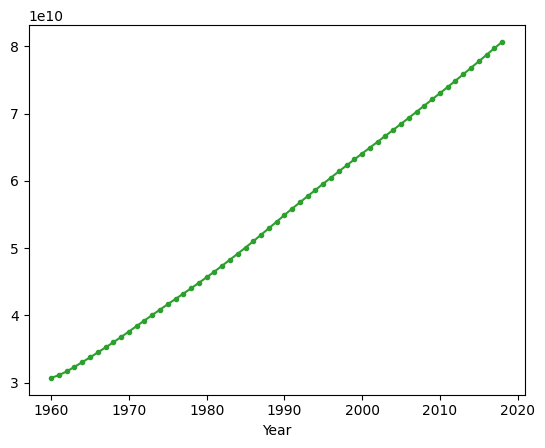

In [27]:
grouped_df = data_1960_2020.groupby('Year')['Value'].sum()

Top 3 countries by population
grouped_df.plot(x="Year", y="Value", color="C2", label="Value", marker=".")

Country Name
Afghanistan       1063693739
Albania            159643639
Algeria           1475264387
American Samoa       2531594
Andorra              3015699
Name: Value, dtype: int64



<Axes: xlabel='Country Name'>

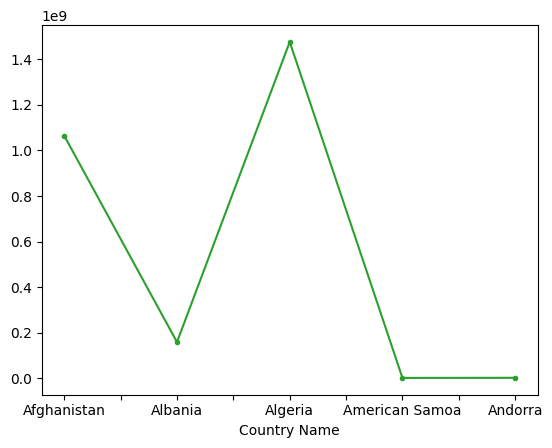

In [121]:
grouped_df = data_1960_2020.groupby('Country Name')['Value'].sum()
print(grouped_df[:5])
print()
grouped_df[:5].plot(x="Country Name", y="Value", color="C2", label="Value", marker=".")

Country Name
Afghanistan    1063693739
Albania         159643639
Algeria        1475264387
Name: Value, dtype: int64


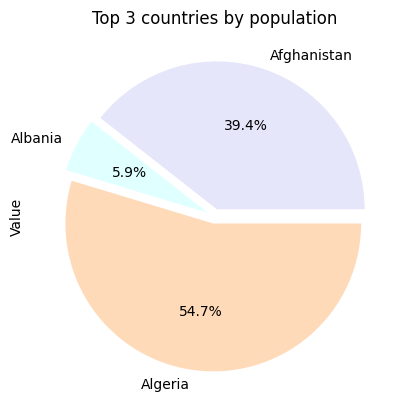

In [120]:
grouped_df = data_1960_2020.groupby('Country Name')['Value'].sum()
top3 = grouped_df[:3]
print(top3)

explode = (0.05, 0.05, 0.05)
colors = ['lavender', 'lightcyan', 'peachpuff']
plt.title('Top 3 countries by population')
res = top3.plot(kind='pie', y = 'Value', autopct='%1.1f%%', explode=explode, colors = colors, shadow=False).get_figure()
res.savefig('./tables and graphs/pie1.png')